# Assignment 1: Sound Processing Fundamentals

CS-GY 9223: Machine Listening

Below you will find a mix of coding questions and writing questions to familiarize you with the fundamentals of signal processing in Python.

**Read through the text, code, and comments carefully and fill-in the blanks accordingly. Written questions will be denoted with❓, and code questions will be explained in code comments, with "TODO" markers.**

**For all plots, include axis labels with units of measurement when applicable. Lack of this will result in small points deductions.**

The assignment will be 10 points total, with coding and text questions labeled with associated point values.
There is a 0.5 point **extra credit** question at the end of the assignment!


In [145]:
# Start by importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd # useful for playing audio in the notebook
import librosa
from scipy import signal

---

## Part 1: Basics [2 pts]
Let's start by getting familiar with the basics of working with audio signals in Python.

### Working with simple waveforms
First, recall the equation for the simplest periodic wave, a **sinusoid**:

$x(t) = A * sin(2\pi ft + \theta)$

where $A$ is amplitude, $f$ is frequency, $t$ is time, and $\theta$ is phase.

**Before writing any code:** 


❓ **1.**  What is the total number of samples for a 4-second sine wave with a sampling rate of 32,000 (i.e. 32kHz)? [0.1 pt]

- **ANSWER**: 128K samples


❓ **2.**  I have a sine wave with 32,000 samples and I know it is 2 seconds long. What is the sampling rate? [0.1 pt]

- **ANSWER**: 16 KHz

In [3]:
# TODO : Write a function to generate a sine wave. [0.5 pts]

def get_sinusoid(amplitude, frequency, duration, sr, phase=0):
    """
    Generate a sine wave signal.

    Parameters:
    ----------
    amplitude : float
        The peak amplitude of the sine wave.
    frequency : float
        The frequency of the sine wave in Hertz (Hz).
    duration : float
        The duration of the sine wave in seconds.
    sr : int
        The sampling rate, in samples per second (Hz).
    phase : float, optional
        The initial phase of the sine wave in radians. Default is 0.

    Returns:
    -------
    numpy.ndarray
        A 1D array containing the generated sine wave samples.
    
    """
    x = np.linspace(0,duration,int(sr*duration),endpoint=False)
    y = amplitude * np.sin(2 * np.pi * frequency * x)

       
        
    return y


In [25]:
# TODO : Use your function to generate two sine waves [0.1 pt]
"""
`wav1`: amp = 1, freq=440, duration=0.5, sr=16000, phase=0
`wav2`: amp = 0.5, freq=1000, duration=0.5, sr=16000, phase=0
"""
wav1 = get_sinusoid(1,440,0.5,16000,0)
wav2 = get_sinusoid(0.5,1000,0.5,16000,0)

Text(0, 0.5, 'Amplitude')

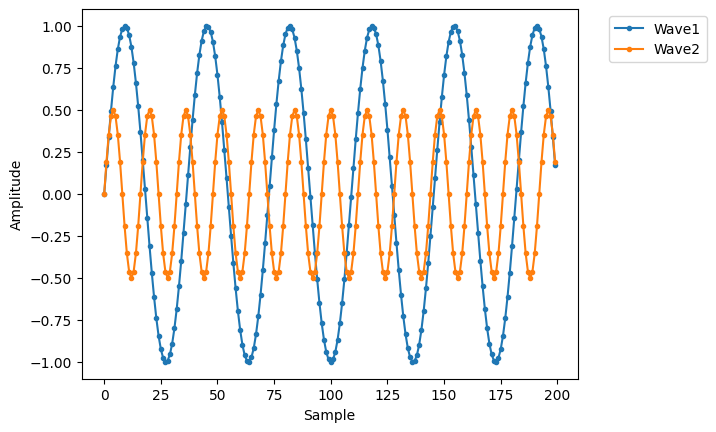

In [33]:
# TODO : Use matplotlib to plot *the first 200 samples* of your two waveforms on the same plot [0.1 pt]
# Hint: plt.plot(wav....) 
# Hint 2: Use 'marker = '.' in your plot to show the discretization of your signal.

plt.plot(wav1[:200], marker='.', label='Wave1')
plt.plot(wav2[:200], marker='.', label='Wave2')
plt.legend(bbox_to_anchor = (1.05,1.0),loc= "upper left")
plt.xlabel("Sample")
plt.ylabel("Amplitude")




In [34]:
# TODO : Use IPython to play your audio in the notebook and listen to your audio! [0.1 pt]
# Ref: https://musicinformationretrieval.com/ipython_audio.html#IPython.display.Audio

ipd.Audio(wav1, rate=16000) # load a NumPy array


In [35]:
ipd.Audio(wav2, rate=16000) # load a NumPy array

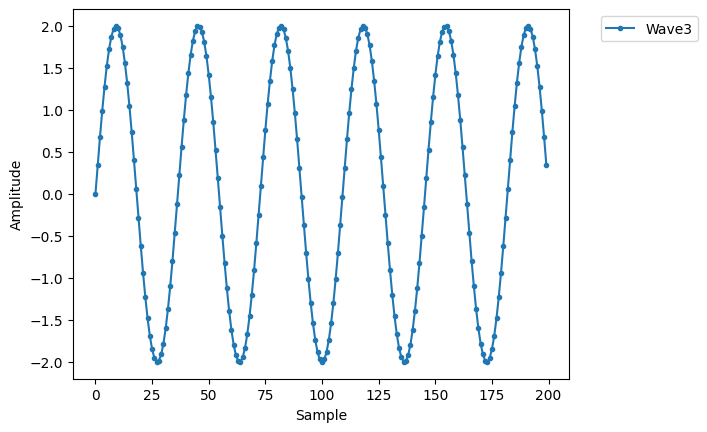

In [36]:
# TODO : Add wav1 and and wav1 together (or multiply it by 2) 
# Examine this result with a plot and listen to the audio [0.05 pts]
wav3 = np.add(wav1,wav1)
plt.plot(wav3[:200], marker='.', label='Wave3')
plt.legend(bbox_to_anchor = (1.05,1.0),loc= "upper left")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

ipd.Audio(wav3, rate=16000, autoplay=True) # load a NumPy array


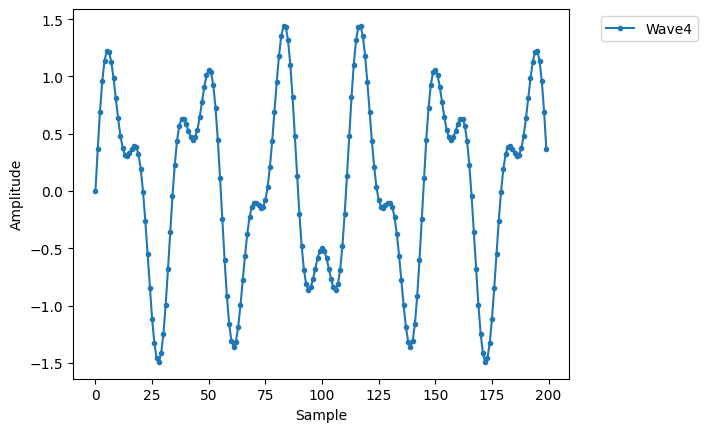

In [37]:
#Plot the sum of wav1 and wav2 [0.05pt]
wav4 = wav1 + wav2
plt.plot(wav4[:200], marker='.', label='Wave4')
plt.legend(bbox_to_anchor = (1.05,1.0),loc= "upper left")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
ipd.Audio(wav4, rate=16000)




##### Taking a closer look at sample rate...

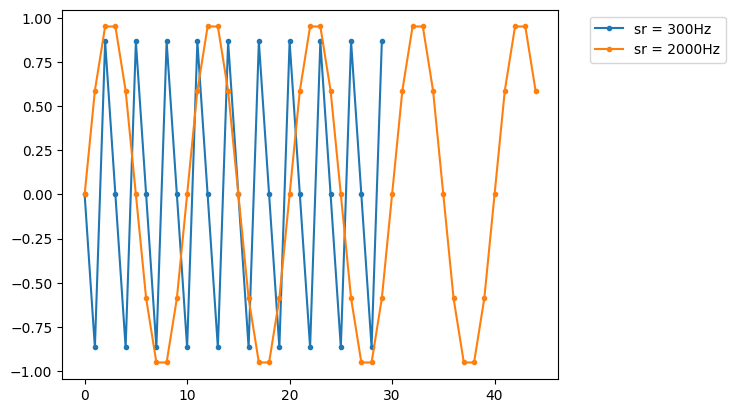

In [40]:
# TODO Generate two sine waves with the following parameters: [0.1 pt]
"""
`sr1`: amp=1, freq=200, duration=0.1, sr=300, phase=0
`sr2`: amp=1, freq=200, duration=0.1, sr=2000, phase=0
"""
sr1 = get_sinusoid(1,200,0.1,300,0)
sr2 = get_sinusoid(1,200,0.1,2000,0)

# TODO Plot the two sine waves on the same plot, with a legend showing their sample rates. [0.1 pt]
plt.plot(sr1[:45], marker='.', label='sr = 300Hz')
plt.plot(sr2[:45], marker='.', label='sr = 2000Hz')
plt.legend(bbox_to_anchor = (1.05,1.0),loc= "upper left")



❓ **3.** Above, the waveform with a frequency of 200 and sample rate of 300 illustrates the phenomena of aliasing. Explain how this is shown in your  plot. [0.1 pt]

- **ANSWER**: The Nyquist criterion is not met. The 200Hz signal is larger than the Nyquist Frequency of 150Hz leading to lost data points for that signal. 




---
#### What about other types of waveforms?

Before we move on, let's experiment with one other waveform type: the **sawtooth** wave as seen in class. The closed form equation here is a bit trickier, so we'll use `scipy`'s built in function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html#sawtooth


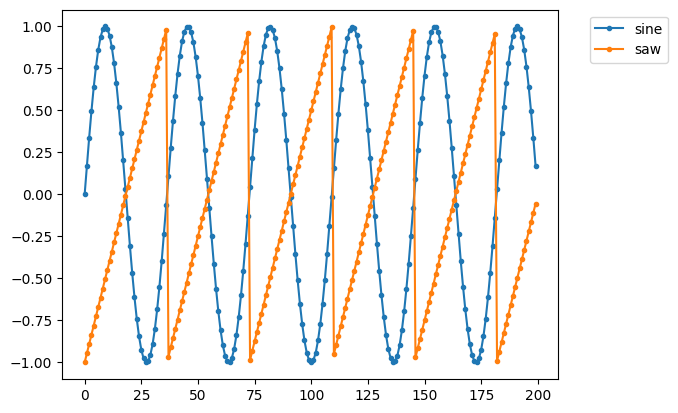

In [43]:
# TODO: define a sine wave AND a sawtooth wave (using SciPY) using the following parameters: [0.1 pt]
"""
params: amp = 1, freq=440, duration=1, sr=16000, phase=0
"""

sin = get_sinusoid(1,440,1,16000,0)
t = np.linspace(0,1,int(16000*1),endpoint=False)
saw = signal.sawtooth(2*np.pi*440*t)

# TODO : Plot the sine and sawtooth waves overlayed (plot :200 for clarity) [0.1 pt]
plt.plot(sin[:200],marker='.',label = 'sine')
plt.plot(saw[:200],marker='.',label = 'saw')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')


❓ **4.** The sawtooth wave is made up of the fundamental frequency and harmonics, while the sine wave only has its fundamental frequency. [0.1 pt]


- **ANSWER:** Harmonics





---


### Loading audio clips
Before we get more complicated with simple signals, let's also make sure you know how to load a real-world audio clip in Python.

**[Librosa](https://librosa.org/doc/latest/index.html)** is an awesome library for audio processing in Python, created by Brian McFee (NYU Professor!). We will use Librosa a lot in this class.

For now let's just load files with Librosa: https://librosa.org/doc/0.10.2/generated/librosa.load.html#librosa-load.


22050
5.333378684807256
117601


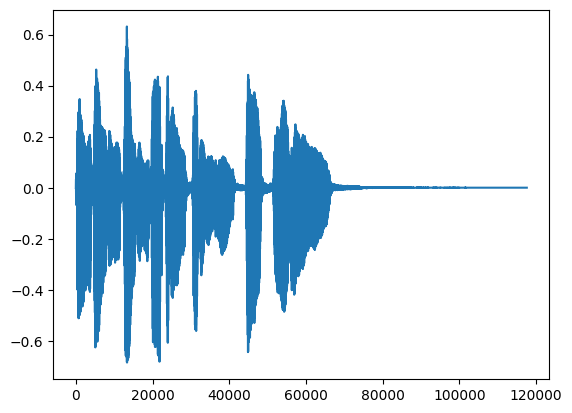

In [130]:
# TODO : Run these first two commands and read the notes [this whole cell: 0.2 pt]
# Librosa has some sample files we can play with:
# If you don't use a sample file, just replace filename with your actual file (i.e. myaudio.wav)
filename = librosa.ex('trumpet')

# There are many parameters to librosa.load (see docs above)
# sr (sample rate) is likely the most important one
# If you pass sr=None, the default sample rate of the file is used.
# If you pass sr=16000, the file will be resampled to that specified sr

# Load our audio file at default sample rate, get our signal and loaded sr 
y, sr = librosa.load(filename, sr=None)

# TODO : print the total number of samples, sampling rate, and duration of file (`y`) in seconds [0.05]
print(sr)
duration = librosa.get_duration(y=y,sr=sr)
print(duration)
print(len(y))




# TODO: plot the signal
plt.plot(y)


In [60]:
# TODO : Play the signal at the original sample rate [0.05 pt]
# Then load the trumpet file at sr=4000, and play that too. Observe the differences!
ipd.Audio(y, rate  = 22050)


In [58]:
# TODO : Play the signal at the original sample rate [0.05 pt]
# Then load the trumpet file at sr=4000, and play that too. Observe the differences!
ipd.Audio(y,rate = 4000)




---


## Part 2: Exploring the Discrete Fourier Transform (DFT) & Fast Fourier Transform (FFT) [4 pts]
In practice we use the **FFT** instead of the raw DFT. The DFT is *very slow* $(O(N^2))$! The FFT is simply an efficient implementation of DFT - it's not really a different algorithm so to speak.

One thing to note is that the DFT and the FFT gives us frequency information on a *global* level, without any temporal information (more to come on that next...)

Let's focus on working with numpy's fft to begin with: https://numpy.org/doc/2.1/reference/generated/numpy.fft.fft.html#numpy.fft.fft.

In [68]:
# TODO: Yay! Write your own function to get the FFT of a signal. [1.5 pts]
# There are a couple nuances here - follow the comments closely to fill-in the blanks here.

def get_fft_spectrum(x, sr):
    """
    Computes the Fast Fourier Transform (FFT) of a 1D signal and
    cleans it up for a spectrum plot.

    Parameters:
    -----------
        x : numpy.ndarray
            Input signal, a 1D array.
        sr : int
            Sampling rate of the input signal.
    Returns:
    -------
        trunc_freq_bins : numpy.ndarray
            A 1D array containing the frequency bins.
            Truncated at N/2.
        trunc_fft : numpy.ndarray
            A 1D array containing the FFT values.
            Tuncated at N/2.
    """
    # Fill in each step below:
    
    # Let N = number of samples
    N = len(x)

    # Define the frequency resolution (from slides)
    # And use this to define the frequency bins
    # Hint: use np.arange for the frequency bins...
    freq_bins = np.fft.fftfreq(N,d=1/sr)

    # Get the FFT of X. Note this will include complex values.
    fft = np.fft.fft(x)

    # Because the FFT is symmetric around N/2:
    # Truncate the frequency bins to only include the first half
    trunc_freq_bins = freq_bins[:int(N/2)]

    # For the FFT itself, get rid of the complex portion 
    # and truncate to only include the first half
    trunc_fft = abs(fft[:int(N/2)])
    # Finally normalize the magnitude of the FFT by the number of samples it has

    normalized_fft = trunc_fft/N

    # Return your frequency bins and FFT values
    return trunc_freq_bins, normalized_fft


#### Using your FFT function

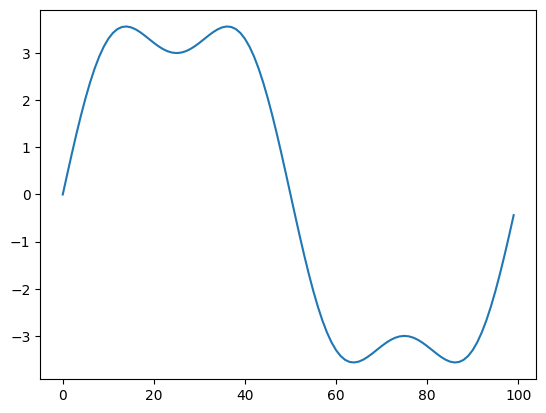

In [65]:
# TODO : Let's try out your function with a simple example [0.1 pt]
"""
`x`: freq=1, amp=4, duration=1, sr=100
"""
x = get_sinusoid(4,1,1,100)

# TODO : Now add a second wave to it, with freq=3, amp=1,d duration=1, sr=100
y = x + get_sinusoid(1,3,1,100)
# TODO : Plot the additive waveform
plt.plot(y[:200])

<StemContainer object of 3 artists>

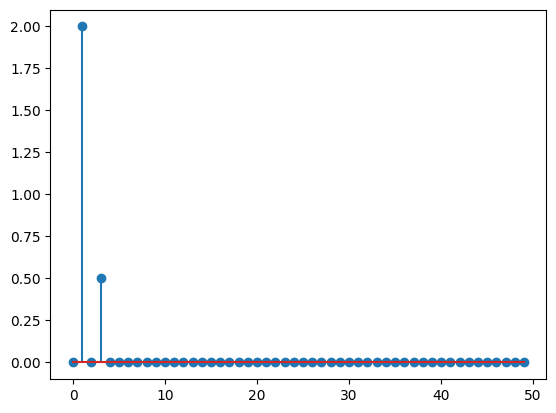

In [73]:
# TODO : Use your FFT function to get the freqs and FFT bins for x. [0.1 pt]

a,b = get_fft_spectrum(y,100)

# TODO : Plot the spectrum [0.1 pt]
# Hint: use plt.stem()
plt.stem(b)



**TODO**: Create a sine wave with `amp=1`, `freq=5.5`, `duration=1`, `sr=100`.  

**For each scenario below**, create a plot containing two subplots: the top row should show the time domain signal, and the bottom row plot should show the magnitude spectrum, from your FFT function.

Do this three times, with the three variations shown below:


#### FFT Part 1: Original Signal

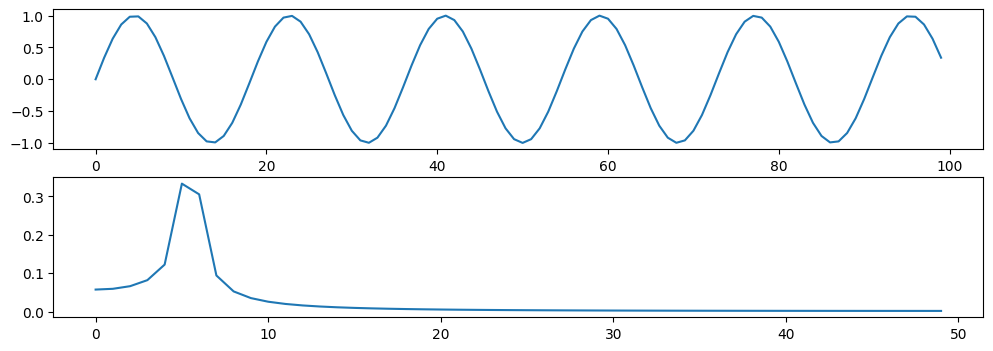

In [87]:
# TODO : Part 1 [0.5 pt]
# Plot the original time domain signal and magnitude spectrum of the signal described above.
"""
`y`: amp = 1, freq=5.5, duration=1, phase = 0, sr=100
"""
y = get_sinusoid(1,5.5,1,100.0)
a,b = get_fft_spectrum(y,100)
fig,axs = plt.subplots(2,1,figsize=(12,4))
axs[0].plot(y[:200])
axs[1].plot(b)



❓ **TODO: 5.** Why are there peaks in the spectrum at frequencies besides 5.5hz, if this is a pure sine wave? What is this phenomena called? [0.1 pt]

- **ANSWER:** Aliasing

#### FFT Part 2: Padding

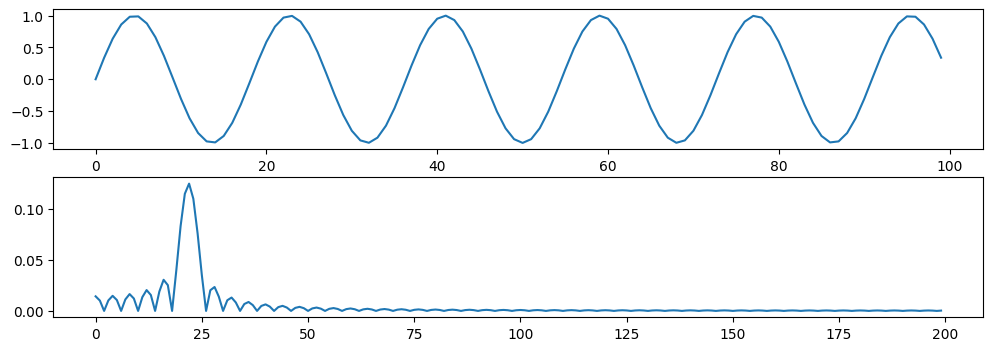

In [92]:
# TODO : Part 2 [0.5 pt]
# Zero-pad the end of the [same] signal to make it 4x the length of the original signal.
# Plot this new signal and the spectrum
padded_y = np.append(y,np.zeros(3*len(y))) 
p_a, p_b = get_fft_spectrum(padded_y,100)

fig,axs = plt.subplots(2,1,figsize=(12,4))
axs[0].plot(padded_y[:100])
axs[1].plot(p_b)



❓ **TODO: 6.** How does this change the spectrum vs. the original one without zero-padding? [0.1 pt]

- **ANSWER**: The peak is more clear, due to interpolation 


#### FFT Part 3: Windowing


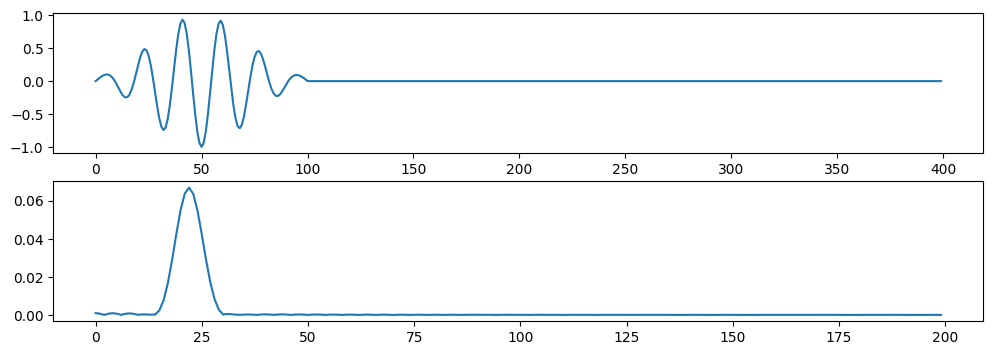

In [103]:
# TODO : Part 3 [0.5 pt]
# Apply a window to the [same] signal. Experiment with at least two window types.
# Hint: zero-pad the windowed signal to 4x the original length, as we did in part 2.
y_windowed = signal.windows.hamming(len(y)) * y

y_b_windowed = signal.windows.blackman(len(y)) * y

y_w_p = np.append(y_windowed,np.zeros(3*len(y)))

y_b_p = np.append(y_b_windowed,np.zeros(3*len(y)))

a_pw, b_pw = get_fft_spectrum(y_w_p,100)

a_pwb, b_pwb = get_fft_spectrum(y_b_p,100)

fig,axs = plt.subplots(2,1,figsize = (12,4))

axs[0].plot(y_w_p)
axs[1].plot(b_pw)



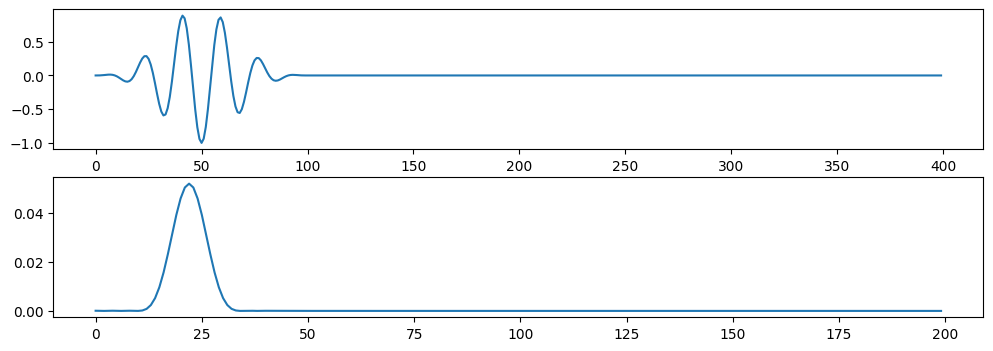

In [106]:
fig,axs = plt.subplots(2,1,figsize = (12,4))
axs[0].plot(y_b_p)
axs[1].plot(b_pwb)

🥳🥳🥳 **Nice!**

From here on out, **zero-padding** and **windowing** will be used almost always, because of the effects we showed above.

--- 
### Applying the FFT to real audio [0.5 pt]

**TODO:** Use your function to get the frequency bins and FFT of the **FIRST 4000** samples of the trumpet sample from Librosa above. 

We want to isolate this to just a single note for the purpose of this exercise, which is why we're truncating here.

In [110]:
# TODO: Load the trumpet sample and truncate to 4k samples
filename = librosa.ex('trumpet')
y,sr = librosa.load(filename,sr = None)
y_truncated = y[:4000]

a,b = get_fft_spectrum(y_truncated)



In [115]:
# TODO: Play the audio and plot it
ipd.Audio(y_truncated, rate =22050)


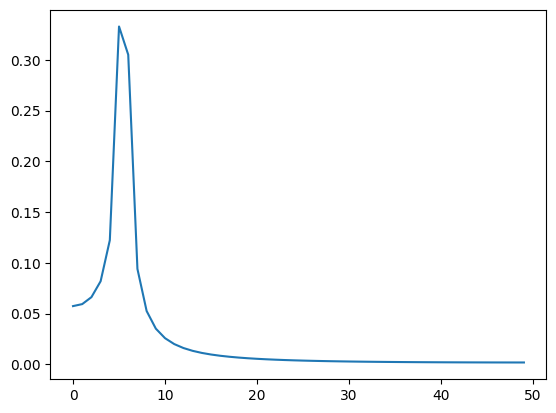

In [116]:
# TODO: Use your FFT function on the trumpet sample above.
# Plot the spectrum. Do the peaks correspond with the pitch of this note as expected?

plt.plot(b)





---

## Part 3: FFT -> Short Time Fourier Transform (STFT) & Spectrograms [4 pts]
The STFT applies the FFT to short frames of time, i.e. **"frames"**, yielding a time-frequency representation of a signal instead of a simple spectrum. Because we are applying this at a "frame" level, there are a number of parameters to play with that provide different tradeoffs in terms of temporal and frequency resolution.

❓ 7. What do you gain from using the STFT vs the DFT/FFT? [0.1 pt]

- **ANSWER**: STFT lets you create a spectrogram that shows frequencies over time, as opposed to DFT which only shows frequency and magnitude. 

❓ 8. How many STFT output frames would there be given a 2-sec signal with sample rate 16,000, with a frame size of 1024 and hop size of 512? Show your calculations. [0.1 pt]

- **ANSWER**: (32000-1024/512)+1 = 61


#### Next you'll be designing your own STFT function!

In [146]:
# TODO : Write a function for a basic STFT, following the function def below. [2 pt]
# DO NOT USE LIBROSA, but you can use numpy :)
# Hint: use "np.fft.rfft" to only get the real, non-negative frequencies here
# Hint: use zero-padding to add a half frame of padding to the start and end of the signal to make sure no info is lost.

def simple_stft(x, frame_len, hop_len, window_type='boxcar'):
    """
    Computes the Short-Time Fourier Transform (STFT) of a 1D signal.

    Parameters:
    -----------
        x : numpy.ndarray
            Input signal, a 1D array.
        frame_len :  int
            Length of each frame (window size).
        hop_len : int
            Hop length between consecutive frames.
        window_type : str
            Type of window e.g. "hann", "boxcar".

    Returns:
    --------
    stft_result : numpy.ndarray
        A 2D array (n_freqs, n_frames) where each row corresponds to the real,
        non-negative frequency components of a frame.

    """

    # Add half frame of zero-padding to the start and end of the signal
    pad_len = frame_len // 2
    x_padded = np.pad(x, (pad_len, pad_len), mode='constant')

    # Get the window function
    window = signal.get_window(window_type, frame_len)

    # Calculate the number of frames
    n_frames = 1 + (len(x_padded) - frame_len) // hop_len

    # Initialize the STFT result array
    n_freqs = frame_len // 2 + 1
    stft_result = np.zeros((n_freqs, n_frames), dtype=np.complex64)

    # Compute the STFT
    for i in range(n_frames):
        start = i * hop_len
        end = start + frame_len
        frame = x_padded[start:end] * window
        stft_result[:, i] = np.fft.rfft(frame)

    return stft_result
    

In [147]:
# TODO : sanity check 1 [0.1]
# Run these checks on dummy signals to make sure your STFT has the right number of frames.
sig = np.random.rand((200))
test1 = simple_stft(sig, frame_len=80, hop_len=30, window_type='boxcar')
print(test1.shape)
assert test1.shape == (41,7)

(41, 7)


In [148]:
# TODO : sanity check 2 [0.1]
sig2 = np.random.rand((200))
test2 = simple_stft(sig2, frame_len=80, hop_len=80, window_type='boxcar')
print(test2.shape)
assert test2.shape == (41,3)

(41, 3)


In [149]:
# TODO : sanity check 3 [0.1]
sig3 = np.random.rand((200))
test3 = simple_stft(sig3, frame_len=80, hop_len=100, window_type='boxcar')
print(test3.shape)
assert test3.shape == (41,3)

(41, 3)


In [150]:
# TODO : Confirm your answer to question #8 using your function and a dummy signal [0.1]
sig4 = np.random.rand((2*16000))
test4 = simple_stft(sig4,frame_len = 1025,hop_len = 512,window_type = 'boxcar')
print(test4.shape)


(513, 63)


### STFT -> Spectrograms
Now let's apply your STFT function to real audio.

In [125]:
# Let's use the Librosa trumpet example file from above to work with our STFT [0.1]
# TODO : load the trumpet audio, and truncate it to be only 3 seconds long.
filename = librosa.ex('trumpet')
y,sr = librosa.load(filename,sr = None)

y_trunc = y[:12000]


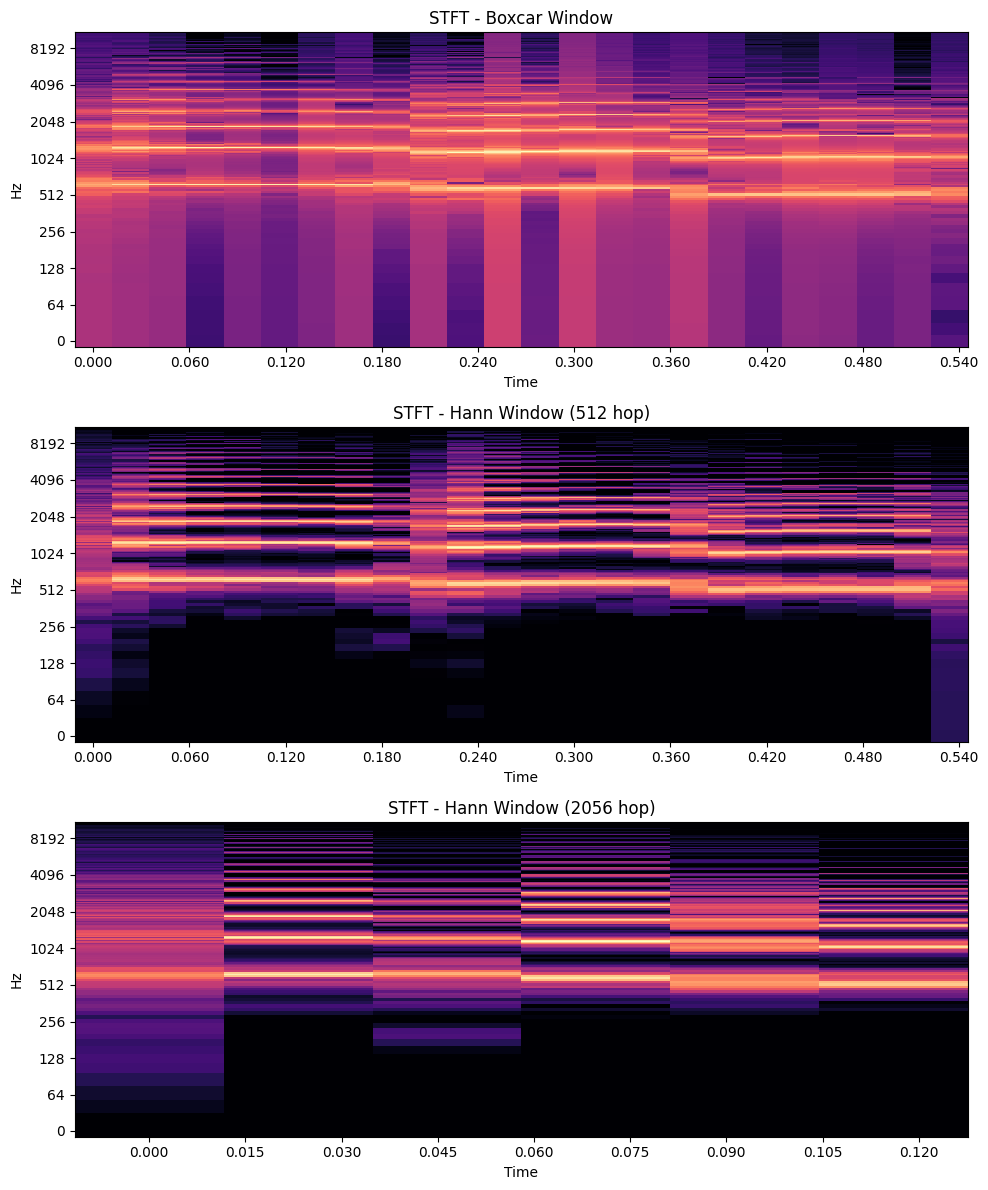

In [129]:
# TODO : Run `simple_stft` with three different sets of parameters:  [0.2 pt]
"""
`stft1`:  frame_len=1024, hop_len=512, window='boxcar'
`stft2`:  frame_len=1024, hop_len=512, window='hann'
`stft3`:  frame_len=1024, hop_len=2056, window='hann'
"""
stft1 = simple_stft(y_trunc,1024,512,'boxcar')
stft2 = simple_stft(y_trunc,1024,512,'hann')
stft3 = simple_stft(y_trunc,1024,2056,'hann')

# TODO : Plot a spectrogram from each of these STFTs (THREE PLOTS TOTAL) [1 pt]
# Hint: You can use plt.imshow (with some finagling), or check out librosa.display.specshow
# Hint: You will need to take the absolute value of the STFT and also convert it from amplitude to DB. 

# Convert STFT results to dB scale
stft1_db = librosa.amplitude_to_db(np.abs(stft1), ref=np.max)
stft2_db = librosa.amplitude_to_db(np.abs(stft2), ref=np.max)
stft3_db = librosa.amplitude_to_db(np.abs(stft3), ref=np.max)

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Time and Frequency axes
sr = 22050  # Adjust sample rate if necessary

# Plot STFT1
librosa.display.specshow(stft1_db, sr=sr, x_axis="time", y_axis="log", ax=axes[0])
axes[0].set_title("STFT - Boxcar Window")

# Plot STFT2
librosa.display.specshow(stft2_db, sr=sr, x_axis="time", y_axis="log", ax=axes[1])
axes[1].set_title("STFT - Hann Window (512 hop)")

# Plot STFT3
librosa.display.specshow(stft3_db, sr=sr, x_axis="time", y_axis="log", ax=axes[2])
axes[2].set_title("STFT - Hann Window (2056 hop)")


plt.tight_layout()
plt.show()



❓ **9.** What do you notice about the differences between each of these spectrograms? Explain the trade-offs between frame and hop lengths and the relationship between the two. [0.1 pt]

- **ANSWER**: Boxcar spectrogram, applies a sharp cutoff leading to spectral leakage. Frequency looks more spread out, but time resolution is high.

- Hann window 512 hop, The Hann window smoothly tapers the signal at the edges, reducing spectral leakage. Frequency bands appear sharper compared to the boxcar window.

- Hann window 2056 hop, Longer window size (1024 → 2056) improves frequency resolution at the cost of lower time resolution.
The frequency bands appear sharper and better defined, but time localization is lost (larger gaps in time).
The transitions in time are more blocky due to the larger hop size.



---

## Extra Credit [0.5 pts, partial possible]
Taking what you've learned above one step further: 
- Plot the STFT of the truncated trumpet sample from the previous exercise in both *linear* and *log* spectrogram scaling.
- Use a function from `librosa` to pitch shift the sample up or down a significant amount (e.g. 10+ steps).
- Plot this pitch-shifted signal in both linear and log spectrograms.

❓ **EC** What do you notice about how the spacing of the harmonics in linear vs. log-scaled spectrograms? Write down some observations of the original and pitch shifted signals in these two settings.